In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data = pd.read_csv("/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv")

In [3]:
data.head()

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female     group B   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   

    TestPrep  MathScore  ReadingScore  WritingScore  
0       none         72            72            74  
1  completed         69            90            88  
2       none         90            95            93  
3       none         47            57            44  
4       none         76            78            75

# Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [5]:
data.describe()

Unnamed: 0     MathScore  ReadingScore  WritingScore
count  30641.000000  30641.000000  30641.000000  30641.000000
mean     499.556607     66.749355     69.624980     68.468327
std      288.747894     15.206049     14.671572     15.307814
min        0.000000      0.000000     10.000000      5.000000
25%      249.000000     56.000000     60.000000     58.000000
50%      500.000000     67.000000     70.000000     69.000000
75%      750.000000     78.000000     80.000000     79.000000
max      999.000000    100.000000    100.000000    100.000000

In [6]:
data.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [7]:
data.head(4)

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female     group B   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   

    TestPrep  MathScore  ReadingScore  WritingScore  
0       none         72            72            74  
1  completed         69            90            88  
2       none         90            95            93  
3       none         47            57            44

In [8]:
expanded_data = pd.read_csv("/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv")
expanded_data.head()

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

In [9]:
expanded_data = expanded_data.drop('Unnamed: 0', axis = 1)
expanded_data.head()

Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

In [10]:
print(expanded_data['WklyStudyHours'].unique)

<bound method Series.unique of 0           < 5
1        5 - 10
2           < 5
3        5 - 10
4        5 - 10
          ...  
30636    5 - 10
30637    5 - 10
30638    5 - 10
30639    5 - 10
30640    5 - 10
Name: WklyStudyHours, Length: 30641, dtype: object>


In [11]:
expanded_data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

# Gender Distribution

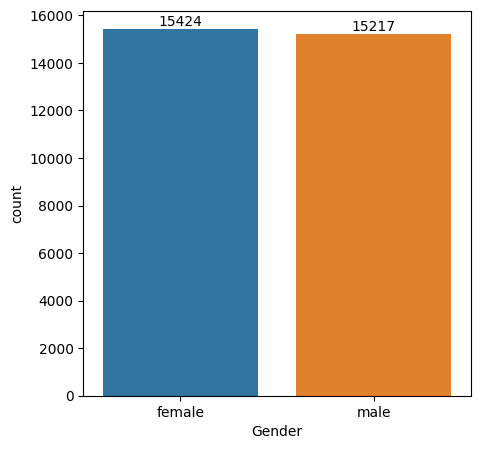

In [12]:
plt.figure(figsize = (5,5))
count = sns.countplot(expanded_data, x= "Gender")
count.bar_label(count.containers[0])
plt.show()

# Effect of Parent Education on Child's Score

In [13]:
gb = expanded_data.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore": 'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


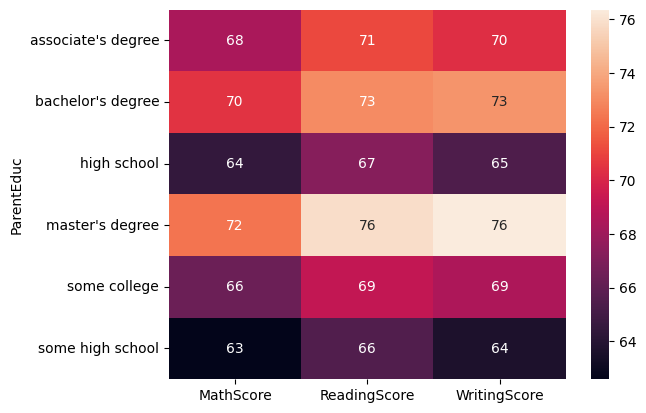

In [15]:
sns.heatmap(gb, annot= True)
plt.show()

In [ ]:
#From above HeatMap ,we concluded that the parent's education is effecting The Marks.Children with parent's having higher education have good marks

# Effect of Parent Marital status

In [17]:
gb = expanded_data.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore": 'mean'})
print(gb)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


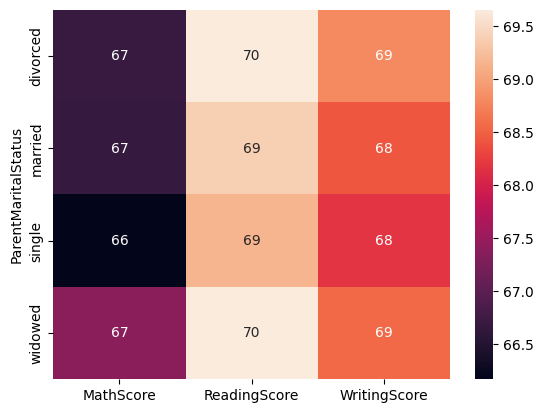

In [20]:
sns.heatmap(gb, annot= True)
plt.show()

#parent's marital status has no impact on children marks

# Ouliers in Data

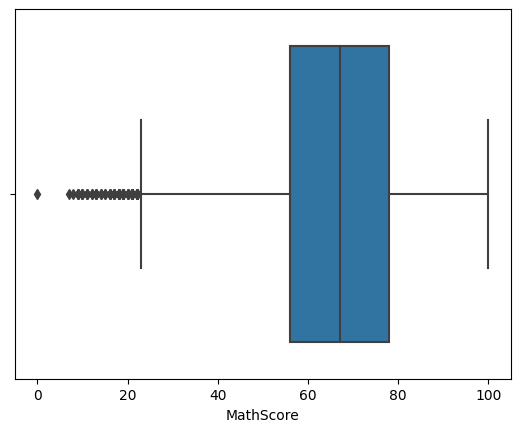

In [21]:
sns.boxplot(expanded_data, x= 'MathScore')
plt.show()

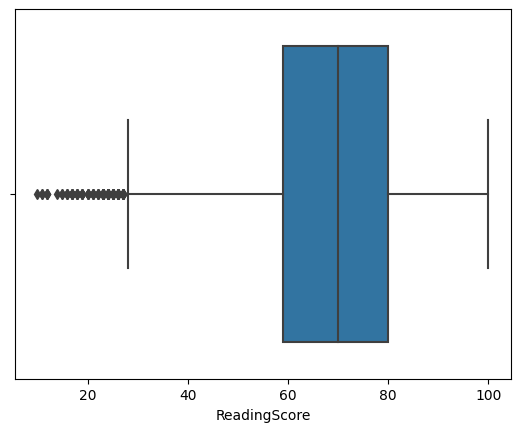

In [22]:
sns.boxplot(expanded_data, x= 'ReadingScore')
plt.show()

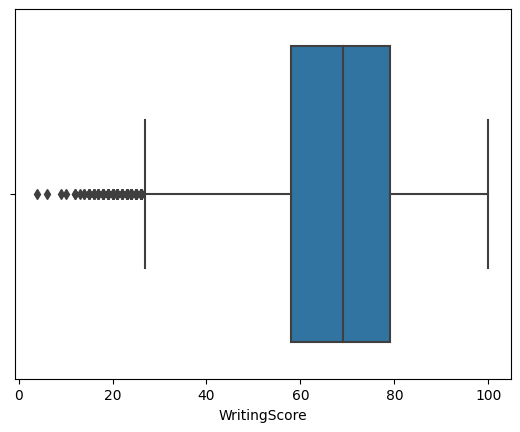

In [23]:
sns.boxplot(expanded_data, x= 'WritingScore')
plt.show()

In [29]:
print(expanded_data['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Groups

In [45]:
group_a_data = expanded_data[expanded_data['EthnicGroup'] == 'group A']
group_a_count = group_a_data.count()
group_b_data = expanded_data[expanded_data['EthnicGroup'] == 'group B']
group_b_count = group_b_data.count()
group_c_data = expanded_data[expanded_data['EthnicGroup'] == 'group C']
group_c_count = group_c_data.count()
group_d_data = expanded_data[expanded_data['EthnicGroup'] == 'group D']
group_d_count = group_d_data.count()
group_e_data = expanded_data[expanded_data['EthnicGroup'] == 'group E']
group_e_count = group_e_data.count()


In [71]:
labels =["Group A", "Group B", "Group C", "Group D", "Group E"]

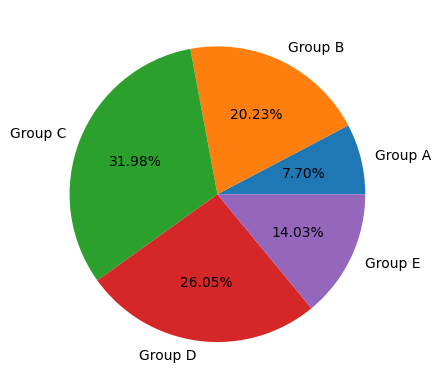

In [78]:
plt.pie(list,labels= labels,autopct="%1.2f%%")
plt.show()